In [276]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# <u>**Static Champions League Results**</u>

We will check what the number of (ir)relevant matches is under the new format of the champions league  
Then we will try to improve that by rescheduling the last couple of rounds 

In [ ]:
# load the data 
cl = pd.read_csv("championsLeagueMetrics.txt", sep = ";")
cl_without_pots = pd.read_csv("championsLeagueMetricsNoPot.txt", sep = ";")
cl_dynamic = pd.read_csv("championsLeagueMetricsDynamic.txt", sep = ";")

Plot the number of ir(relevant) matches during the last three rounds

In [278]:
irrelevant_matches = dict(cl[[col for col in cl.columns if "irrelevant" in col]].mean(axis = 0))
highly_relevant_matches = dict(cl[[col for col in cl.columns if "highly" in col]].mean(axis = 0))
partially_relevant_matches = dict(cl[[col for col in cl.columns if "partially" in col]].mean(axis = 0))

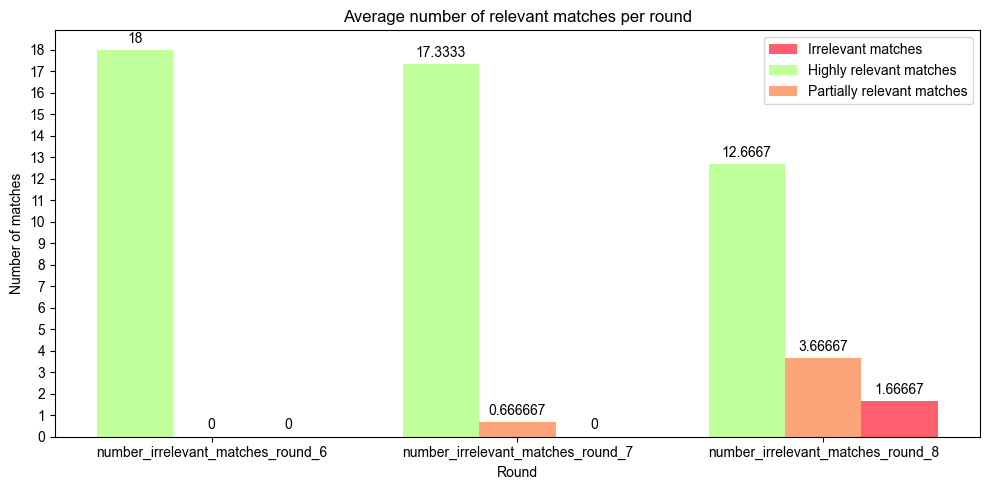

In [279]:
import matplotlib.pyplot as plt
import numpy as np


x = np.array([6, 7, 8])
width = 0.25  # width of the bars

# Set pastel colors for the bars
pastel_colors = ['#ff5e6e', '#fda47a', '#c1ff9b']  # Light blue, orange, and purple
pastel_colors = ['#ff5e6e', '#c1ff9b', '#fda47a']  # Light blue, orange, and purple



fig, ax = plt.subplots(figsize=(10, 5))

# Create the bars
rects1 = ax.bar(x + width, irrelevant_matches.values(), width, label='Irrelevant matches', color=pastel_colors[0])
rects2 = ax.bar(x - width, highly_relevant_matches.values(), width, label='Highly relevant matches', color=pastel_colors[1])
rects3 = ax.bar(x , partially_relevant_matches.values(), width, label='Partially relevant matches', color=pastel_colors[2])

# Set font to Arial
plt.rcParams['font.family'] = 'Arial'

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Round')
ax.set_ylabel('Number of matches')
ax.set_title('Average number of relevant matches per round')
ax.set_xticks(x)
ax.set_xticklabels(list(irrelevant_matches.keys()))
ax.set_yticks(np.arange(0, 19, 1))
ax.legend()

# Add the numbers on top of each bar
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

# Layout and show
fig.tight_layout()
plt.show()

2 potten, met de teams spelen  
kwalificatie voor wk (incomlpete systeem uitdenken)  
rf model training

spelen met ratings  (geljike ratings bijvoorbeeld)
tiebreaker met rating

2 potten

Hoeveel plaatsen al beslist? 

a competittie balance in the post 2024 champions league gyimesi

In [280]:
irrelevant_matches 

{'number_irrelevant_matches_round_6': np.float64(0.0),
 'number_irrelevant_matches_round_7': np.float64(0.0),
 'number_irrelevant_matches_round_8': np.float64(1.6666666666666667)}

In [281]:
no_contenders = dict(cl[[col for col in cl.columns if "undecided" in col]].mean(axis = 0))
no_contenders  

{'number_undecided_round_6': np.float64(36.0),
 'number_undecided_round_7': np.float64(35.333333333333336),
 'number_undecided_round_8': np.float64(29.0)}

In [282]:
irrelevant_matches_no_pot = dict(cl_without_pots[[col for col in cl.columns if "irrelevant" in col]].mean(axis = 0))
highly_relevant_matches_no_pot = dict(cl_without_pots[[col for col in cl.columns if "highly" in col]].mean(axis = 0))
partially_relevant_matches_no_pot = dict(cl_without_pots[[col for col in cl.columns if "partially" in col]].mean(axis = 0))

Now we can try to minimize the number of irrelevant matches in the last round or minimize the number of partially relevant matches in the last round (fraud)

## **Minimize number of irrelevant matches**
Which basically means making sure that teams without something at stake are not scheduled against each other in the last round  
On average there are `9 teams before the final day which have nothing to play for`.  
If we can avoid scheduling those against each other we can make sure that there are no irrelevant matches in the final round.  
  
Maybe we can also avoid this with a static schedule where teams play teams in the same pot in the beginning

In [283]:
highly_relevant_dynamic = dict(cl_dynamic[[col for col in cl_dynamic.columns if "highly_relevant" in col]].mean(axis=0))
irrelevant_dynamic = dict(cl_dynamic[[col for col in cl_dynamic.columns if "irrelevant" in col]].mean(axis=0))
partially_relevant_dynamic = dict(cl_dynamic[[col for col in cl_dynamic.columns if "partially_relevant" in col]].mean(axis=0))

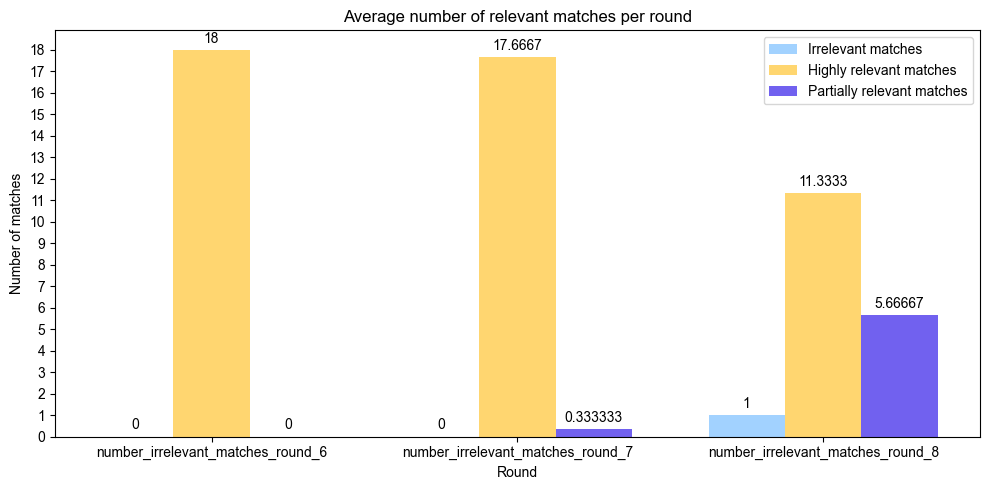

In [284]:
import matplotlib.pyplot as plt
import numpy as np


x = np.array([6, 7, 8])
width = 0.25  # width of the bars

# Set pastel colors for the bars
pastel_colors = ['#a2d2ff', '#ffd670', '#7161ef']  # Light blue, orange, and purple

fig, ax = plt.subplots(figsize=(10, 5))

# Create the bars
rects1 = ax.bar(x - width, irrelevant_dynamic.values(), width, label='Irrelevant matches', color=pastel_colors[0])
rects2 = ax.bar(x, highly_relevant_dynamic.values(), width, label='Highly relevant matches', color=pastel_colors[1])
rects3 = ax.bar(x + width, partially_relevant_dynamic.values(), width, label='Partially relevant matches', color=pastel_colors[2])

# Set font to Arial
plt.rcParams['font.family'] = 'Arial'

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Round')
ax.set_ylabel('Number of matches')
ax.set_title('Average number of relevant matches per round')
ax.set_xticks(x)
ax.set_xticklabels(list(irrelevant_matches.keys()))
ax.set_yticks(np.arange(0, 19, 1))
ax.legend()

# Add the numbers on top of each bar
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

# Layout and show
fig.tight_layout()
plt.show()

In [285]:
test = cl_dynamic[[col for col in cl_dynamic.columns if "undecided" in col]].mean(axis=0)
test.head()

number_undecided_round_6    36.000000
number_undecided_round_7    35.666667
number_undecided_round_8    28.333333
dtype: float64

In [286]:
static_decided = cl[[col for col in cl_dynamic.columns if "undecided" in col]]
dynamic_decided = cl_dynamic[[col for col in cl_dynamic.columns if "undecided" in col]]

In [287]:
static_decided

,number_undecided_round_6,number_undecided_round_7,number_undecided_round_8
0,36,35,29
1,36,36,26
2,36,35,32


In [289]:
dynamic_decided

,number_undecided_round_6,number_undecided_round_7,number_undecided_round_8
0,36,36,29
1,36,36,27
2,36,35,29
